In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importação e tratamento de dados

In [2]:
df_2022 = pd.read_excel("df_2022.xlsx")
df_2023 = pd.read_excel("df_2023.xlsx")

In [3]:
# Função para gerar variação percentual entre dois anos
def calcular_variacao_percentual(valor_inicial, valor_final):
    return ((valor_final - valor_inicial) / valor_inicial) * 100

In [4]:
df_2022.head()

,NU_ANO_CENSO,NO_MUNICIPIO,CO_MUNICIPIO,NO_ENTIDADE,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_SITUACAO_FUNCIONAMENTO,TP_REGULAMENTACAO,TP_RESPONSAVEL_REGULAMENTACAO,IN_LOCAL_FUNC_PREDIO_ESCOLAR,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,2022,Cesário Lange,3511607,COLEGIO CESARIO LANGE,Privada,Urbana,1,1,2,1,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2022,Cesário Lange,3511607,EMEB JOSE ROQUE SOARES,Municipal,Urbana,1,1,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,Cesário Lange,3511607,ARISTEU VASCONCELLOS LEITE,Estadual,Urbana,1,1,2,1,...,0.0,33.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0
3,2022,Cesário Lange,3511607,EMEB OLGA VASCONCELOS LEITE,Municipal,Urbana,1,1,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022,Cesário Lange,3511607,MARIA DE FATIMA DA SILVA PROENCA MOTA PROFA EMEI,Municipal,Urbana,1,1,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_2022.shape

(147, 334)

In [6]:
df_2023.head()

,NU_ANO_CENSO,NO_MUNICIPIO,CO_MUNICIPIO,NO_ENTIDADE,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_SITUACAO_FUNCIONAMENTO,TP_REGULAMENTACAO,TP_RESPONSAVEL_REGULAMENTACAO,IN_LOCAL_FUNC_PREDIO_ESCOLAR,...,QT_TUR_BAS_D,QT_TUR_BAS_N,QT_TUR_BAS_EAD,QT_TUR_INF_INT,QT_TUR_INF_CRE_INT,QT_TUR_INF_PRE_INT,QT_TUR_FUND_INT,QT_TUR_FUND_AI_INT,QT_TUR_FUND_AF_INT,QT_TUR_MED_INT
0,2023,Porangaba,3540507,ESCOLA MUNICIPAL DE ENSINO INFANTIL PROFESSORA...,Municipal,Urbana,1,1,3,1,...,11.0,0.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0
1,2023,Porangaba,3540507,CRECHE MUNICIPAL JOAO GUILHERME SOARES BERTIN,Municipal,Urbana,1,1,3,1,...,10.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
2,2023,Tatuí,3554003,ESCOLA MUNICIPAL DE EDUCACAO INFANTIL SERGIO I...,Municipal,Urbana,1,1,3,1,...,6.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0
3,2023,Tatuí,3554003,EMEF PROFESSOR PAULINHO RIBEIRO,Municipal,Urbana,1,1,3,1,...,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023,Tatuí,3554003,EMEI VALDERES DE SOUSA,Municipal,Urbana,1,1,3,1,...,13.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_2023.shape

(147, 346)

In [8]:
municipios = ['Tatuí', 'Porangaba', 'Cesário Lange', 'Quadra', 'Torre de Pedra', 'Pereiras']

In [9]:
# Cálculo de variações percentuais para matrículas por dependência administrativa
var_percent_dependencia = calcular_variacao_percentual(
    df_2022.groupby('TP_DEPENDENCIA')['QT_MAT_BAS'].sum(),
    df_2023.groupby('TP_DEPENDENCIA')['QT_MAT_BAS'].sum()
)
var_percent_dependencia

TP_DEPENDENCIA
Estadual     1.567034
Municipal    2.315030
Privada     -0.604406
Name: QT_MAT_BAS, dtype: float64

In [10]:
df_2022.groupby('TP_DEPENDENCIA')['QT_MAT_BAS'].sum()

TP_DEPENDENCIA
Estadual     12061.0
Municipal    19395.0
Privada       5129.0
Name: QT_MAT_BAS, dtype: float64

In [11]:
df_2022.groupby('TP_DEPENDENCIA')['QT_DOC_BAS'].sum()

TP_DEPENDENCIA
Estadual      697.0
Municipal    1463.0
Privada       420.0
Name: QT_DOC_BAS, dtype: float64

In [12]:
df_2023.groupby('TP_DEPENDENCIA')['QT_MAT_BAS'].sum()

TP_DEPENDENCIA
Estadual     12250.0
Municipal    19844.0
Privada       5098.0
Name: QT_MAT_BAS, dtype: float64

In [13]:
df_2023.groupby('TP_DEPENDENCIA')['QT_DOC_BAS'].sum()

TP_DEPENDENCIA
Estadual      558.0
Municipal    1631.0
Privada       421.0
Name: QT_DOC_BAS, dtype: float64

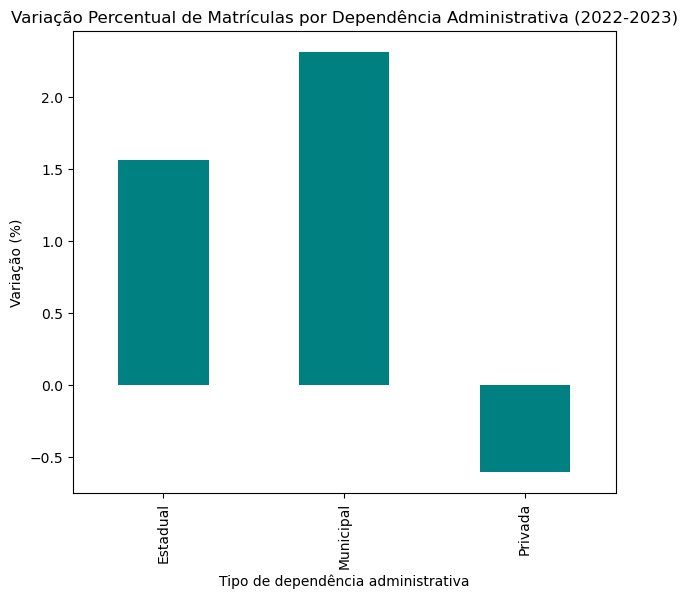

In [14]:
# Gráfico de barras para variação de dependência administrativa
plt.figure(figsize=(7, 6))
var_percent_dependencia.plot(kind='bar', color='teal')
plt.title('Variação Percentual de Matrículas por Dependência Administrativa (2022-2023)')
plt.ylabel('Variação (%)')
plt.xlabel('Tipo de dependência administrativa')
plt.show()

In [15]:
# Cálculo de variação percentual para matrícula urbana/rural
var_percent_localizacao = calcular_variacao_percentual(
    df_2022.groupby('TP_LOCALIZACAO')['QT_MAT_BAS'].sum(),
    df_2023.groupby('TP_LOCALIZACAO')['QT_MAT_BAS'].sum()
)
var_percent_localizacao

TP_LOCALIZACAO
Rural    -0.138600
Urbana    1.732969
Name: QT_MAT_BAS, dtype: float64

In [16]:
(df_2022["TP_LOCALIZACAO"] == "Urbana").sum()

129

In [17]:
(df_2023["TP_LOCALIZACAO"] == "Urbana").sum()

129

In [18]:
(df_2022["TP_LOCALIZACAO"] == "Rural").sum()

18

In [19]:
(df_2023["TP_LOCALIZACAO"] == "Rural").sum()

18

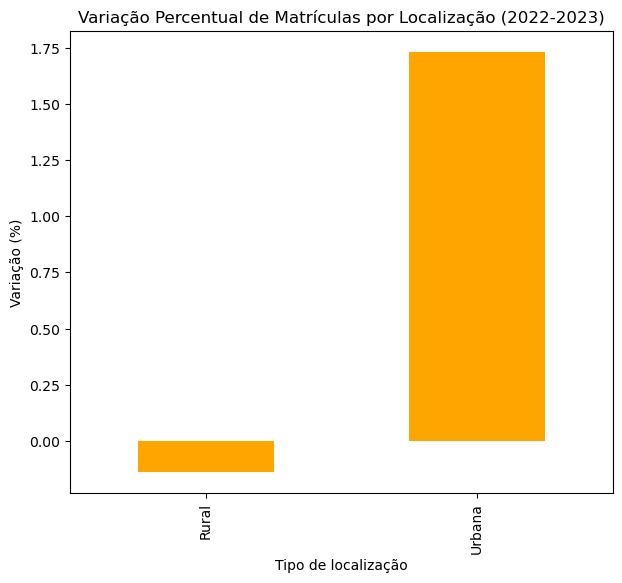

In [20]:
# Gráfico de barras para variação de localização urbana/rural
plt.figure(figsize=(7, 6))
var_percent_localizacao.plot(kind='bar', color='orange')
plt.title('Variação Percentual de Matrículas por Localização (2022-2023)')
plt.ylabel('Variação (%)')
plt.xlabel('Tipo de localização')
plt.show()


## 1. Medidas estatísticas gerais

### Quantidade de Estudantes e Docentes

Calcular a quantidade total de estudantes e docentes em cada município, para cada ano, e a média de alunos por escola.

In [21]:
# Quantidade total de estudantes e docentes
total_estudantes_2022 = df_2022['QT_MAT_BAS'].sum()
total_docentes_2022 = df_2022['QT_DOC_BAS'].sum()
print(f"Em 2022 temos {total_estudantes_2022} estudantes matriculados e {total_docentes_2022} docentes registrados.")

total_estudantes_2023 = df_2023['QT_MAT_BAS'].sum()
total_docentes_2023 = df_2023['QT_DOC_BAS'].sum()
print(f"Em 2023 temos {total_estudantes_2023} estudantes matriculados e {total_docentes_2023} docentes registrados.")

Em 2022 temos 36585.0 estudantes matriculados e 2580.0 docentes registrados.
Em 2023 temos 37192.0 estudantes matriculados e 2610.0 docentes registrados.


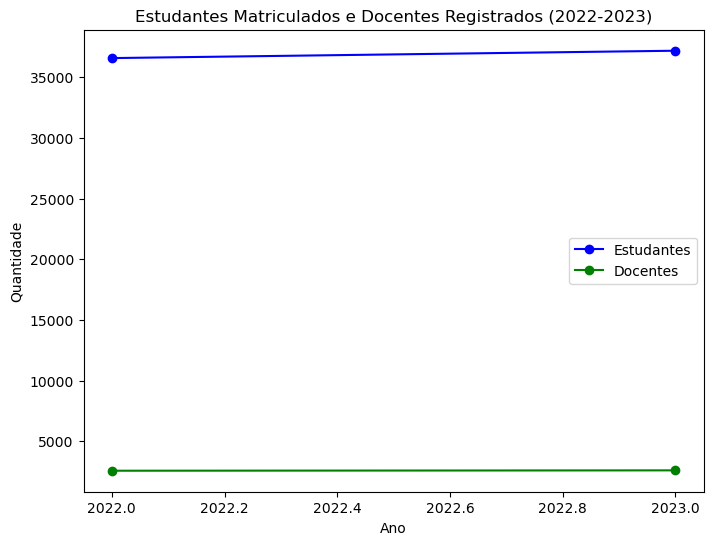

In [22]:
# Gráfico 1: Estudantes Matriculados e Docentes Registrados (Análise Geral)

dados_gerais = {
    "Ano": [2022, 2023],
    "Estudantes Matriculados": [36585, 37192],
    "Docentes Registrados": [2580, 2610],
}
df_dados_gerais = pd.DataFrame(dados_gerais)

plt.figure(figsize=(8, 6))
plt.plot(df_dados_gerais["Ano"], df_dados_gerais["Estudantes Matriculados"], label='Estudantes', marker='o', color='b')
plt.plot(df_dados_gerais["Ano"], df_dados_gerais["Docentes Registrados"], label='Docentes', marker='o', color='g')
plt.title("Estudantes Matriculados e Docentes Registrados (2022-2023)")
plt.xlabel("Ano")
plt.ylabel("Quantidade")
plt.legend()
plt.show()

In [23]:
# Média de alunos por escola
media_alunos_por_escola_2022 = total_estudantes_2022 / len(df_2022)
media_alunos_por_escola_2023 = total_estudantes_2023 / len(df_2023)

print(f"Média de estudantes por escola em 2022: {media_alunos_por_escola_2022}")
print(f"Média de estudantes por escola em 2023: {media_alunos_por_escola_2023}")

Média de estudantes por escola em 2022: 248.87755102040816
Média de estudantes por escola em 2023: 253.00680272108843


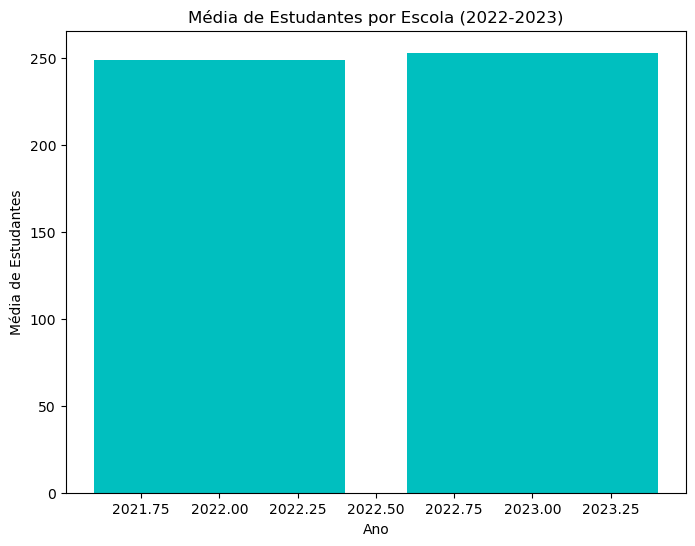

In [24]:
# Gráfico 2: Média de Estudantes por Escola

media_alunos_escola = {
    "Ano": [2022, 2023],
    "Média de Estudantes por Escola": [248.88, 253.01],
}
df_media_alunos_escola = pd.DataFrame(media_alunos_escola)

plt.figure(figsize=(8, 6))
plt.bar(df_media_alunos_escola["Ano"], df_media_alunos_escola["Média de Estudantes por Escola"], color='c')
plt.title("Média de Estudantes por Escola (2022-2023)")
plt.xlabel("Ano")
plt.ylabel("Média de Estudantes")
plt.show()

Esses cálculos são importantes para determinar o tamanho médio das turmas e a relação entre docentes e estudantes, informações relevantes para medir a qualidade do ensino.

### Distribuição por etapas da educação básica

Analisar a quantidade de estudantes matriculados em cada etapa (ensino infantil, fundamental, médio).

In [25]:
# Distribuição de matrículas por etapa em 2022

df_2022_infantil = df_2022['QT_MAT_INF'].sum()
df_2022_fundamental = df_2022['QT_MAT_FUND'].sum()
df_2022_medio = df_2022['QT_MAT_MED'].sum()
df_2022_eja = df_2022['QT_MAT_EJA'].sum()

print(f"Quantidade Ensino Infantil: {df_2022_infantil}")
print(f"Quantidade Ensino Fundamental: {df_2022_fundamental}")
print(f"Quantidade Ensino Médio: {df_2022_medio}")
print(f"Quantidade EJA: {df_2022_eja}")

Quantidade Ensino Infantil: 6919.0
Quantidade Ensino Fundamental: 20676.0
Quantidade Ensino Médio: 7317.0
Quantidade EJA: 384.0


In [26]:
# Distribuição de matrículas por etapa em 2023

df_2023_infantil = df_2023['QT_MAT_INF'].sum()
df_2023_fundamental = df_2023['QT_MAT_FUND'].sum()
df_2023_medio = df_2023['QT_MAT_MED'].sum()
df_2023_eja = df_2023['QT_MAT_EJA'].sum()

print(f"Quantidade Ensino Infantil: {df_2023_infantil}")
print(f"Quantidade Ensino Fundamental: {df_2023_fundamental}")
print(f"Quantidade Ensino Médio: {df_2023_medio}")
print(f"Quantidade EJA: {df_2023_eja}")

Quantidade Ensino Infantil: 7576.0
Quantidade Ensino Fundamental: 20606.0
Quantidade Ensino Médio: 7517.0
Quantidade EJA: 351.0


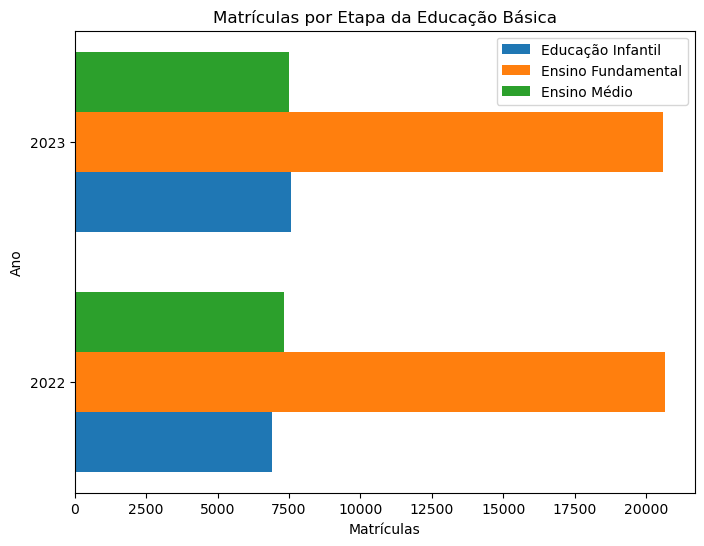

In [27]:
# Gráfico 3: Matrículas por Etapa da Educação

# Dados das matrículas por etapa da educação
matriculas_etapas = {
    "Ano": [2022, 2023],
    "Educação Infantil": [6919, 7576],
    "Ensino Fundamental": [20676, 20606],
    "Ensino Médio": [7317, 7517],
}
df_matriculas_etapas = pd.DataFrame(matriculas_etapas)

# Configuração do gráfico de barras lateral
labels = df_matriculas_etapas["Ano"]
educacao_infantil = df_matriculas_etapas["Educação Infantil"]
ensino_fundamental = df_matriculas_etapas["Ensino Fundamental"]
ensino_medio = df_matriculas_etapas["Ensino Médio"]

x = np.arange(len(labels))  # posições dos grupos
width = 0.25  # largura das barras

# Plotando o gráfico de barras lateral
fig, ax = plt.subplots(figsize=(8, 6))

rects1 = ax.barh(x - width, educacao_infantil, width, label='Educação Infantil')
rects2 = ax.barh(x, ensino_fundamental, width, label='Ensino Fundamental')
rects3 = ax.barh(x + width, ensino_medio, width, label='Ensino Médio')

# Adicionando os títulos e legendas
ax.set_xlabel('Matrículas')
ax.set_ylabel('Ano')
ax.set_title('Matrículas por Etapa da Educação Básica')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()

# Exibindo o gráfico
plt.show()

### Desigualdade por dependência administrativa e localização

Verificamos como as matrículas e os recursos estão distribuídos entre escolas públicas e privadas, em áreas urbanas e rurais.

In [28]:
# Distribuição por dependência administrativa
df_2022_dependencia = df_2022.groupby('TP_DEPENDENCIA')['QT_MAT_BAS'].sum()
df_2023_dependencia = df_2023.groupby('TP_DEPENDENCIA')['QT_MAT_BAS'].sum()

In [29]:
df_2022_dependencia

TP_DEPENDENCIA
Estadual     12061.0
Municipal    19395.0
Privada       5129.0
Name: QT_MAT_BAS, dtype: float64

In [30]:
df_2023_dependencia

TP_DEPENDENCIA
Estadual     12250.0
Municipal    19844.0
Privada       5098.0
Name: QT_MAT_BAS, dtype: float64

In [33]:
# Distribuição urbana/rural
df_2022_localizacao = df_2022.groupby('TP_LOCALIZACAO')['QT_MAT_BAS'].sum()
df_2023_localizacao = df_2023.groupby('TP_LOCALIZACAO')['QT_MAT_BAS'].sum()

In [34]:
df_2022_localizacao

TP_LOCALIZACAO
Rural      1443.0
Urbana    35142.0
Name: QT_MAT_BAS, dtype: float64

In [35]:
df_2023_localizacao

TP_LOCALIZACAO
Rural      1441.0
Urbana    35751.0
Name: QT_MAT_BAS, dtype: float64

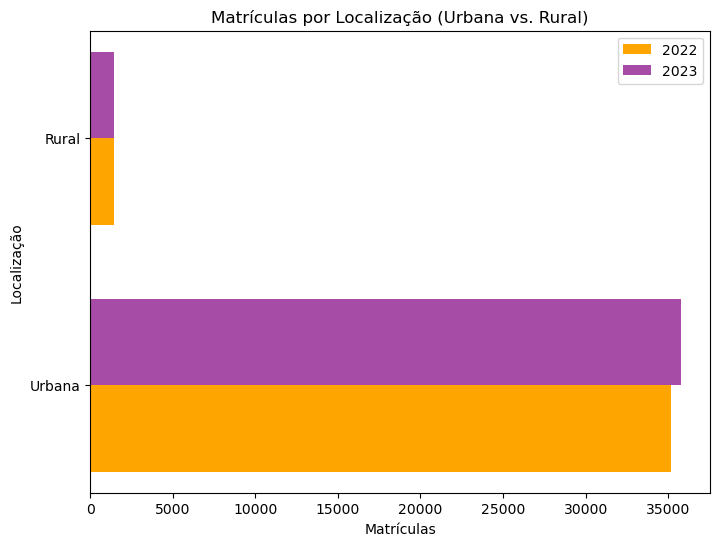

In [36]:
# Gráfico 5: Matrículas por Localização (Urbana vs. Rural)

# Dados de matrículas por localização (Urbana vs. Rural)
matriculas_localizacao = {
    "Localização": ["Urbana", "Rural"],
    "Matrículas 2022": [35142, 1443],
    "Matrículas 2023": [35751, 1441],
}
df_matriculas_localizacao = pd.DataFrame(matriculas_localizacao)

# Gráfico de barras horizontais sem empilhamento, com barras separadas para cada ano
plt.figure(figsize=(8, 6))
width = 0.35  # Largura das barras
y = np.arange(len(df_matriculas_localizacao["Localização"]))  # Posições no eixo y

# Plotando as barras separadas para cada ano
plt.barh(y - width/2, df_matriculas_localizacao["Matrículas 2022"], width, label='2022', color='orange')
plt.barh(y + width/2, df_matriculas_localizacao["Matrículas 2023"], width, label='2023', color='purple', alpha=0.7)

# Adicionando título e legendas
plt.yticks(y, df_matriculas_localizacao["Localização"])
plt.title("Matrículas por Localização (Urbana vs. Rural)")
plt.xlabel("Matrículas")
plt.ylabel("Localização")
plt.legend()

# Exibindo o gráfico
plt.show()


Essas análises ajudam a identificar desigualdades na distribuição de recursos, como o número de estudantes em escolas públicas e privadas, e a discrepância entre áreas urbanas e rurais.

### Análise da infraestrutura escolar

Avaliar quantas escolas possuem recursos como:


In [37]:
# Percentual de escolas e seus recursos de infraestrutura
df_2022_recursos = df_2022[
    [
        'IN_AGUA_POTAVEL',
        'IN_AGUA_INEXISTENTE',
        'IN_ENERGIA_REDE_PUBLICA',
        'IN_ENERGIA_INEXISTENTE',
        'IN_ESGOTO_INEXISTENTE',
        'IN_BANHEIRO',
        'IN_BANHEIRO_PNE',
        'IN_BIBLIOTECA',
        'IN_BIBLIOTECA_SALA_LEITURA',
        'IN_LABORATORIO_INFORMATICA',
        'IN_LABORATORIO_CIENCIAS',
        'IN_QUADRA_ESPORTES',
        'IN_PISCINA',
        'IN_AUDITORIO',
        'IN_REFEITORIO',
        'IN_ALIMENTACAO'
    ]
].mean() * 100

df_2023_recursos = df_2023[
    [
        'IN_AGUA_POTAVEL',
        'IN_AGUA_INEXISTENTE',
        'IN_ENERGIA_REDE_PUBLICA',
        'IN_ENERGIA_INEXISTENTE',
        'IN_ESGOTO_INEXISTENTE',
        'IN_BANHEIRO',
        'IN_BANHEIRO_PNE',
        'IN_BIBLIOTECA',
        'IN_BIBLIOTECA_SALA_LEITURA',
        'IN_LABORATORIO_INFORMATICA',
        'IN_LABORATORIO_CIENCIAS',
        'IN_QUADRA_ESPORTES',
        'IN_PISCINA',
        'IN_AUDITORIO',
        'IN_REFEITORIO',
        'IN_ALIMENTACAO'
    ]
].mean() * 100


In [38]:
df_2022_recursos

IN_AGUA_POTAVEL                99.319728
IN_AGUA_INEXISTENTE             0.000000
IN_ENERGIA_REDE_PUBLICA       100.000000
IN_ENERGIA_INEXISTENTE          0.000000
IN_ESGOTO_INEXISTENTE           0.000000
IN_BANHEIRO                    99.319728
IN_BANHEIRO_PNE                43.537415
IN_BIBLIOTECA                   5.442177
IN_BIBLIOTECA_SALA_LEITURA     36.054422
IN_LABORATORIO_INFORMATICA     31.972789
IN_LABORATORIO_CIENCIAS         8.843537
IN_QUADRA_ESPORTES             34.013605
IN_PISCINA                      2.040816
IN_AUDITORIO                    2.721088
IN_REFEITORIO                  70.068027
IN_ALIMENTACAO                 86.394558
dtype: float64

In [39]:
df_2023_recursos

IN_AGUA_POTAVEL                98.639456
IN_AGUA_INEXISTENTE             0.000000
IN_ENERGIA_REDE_PUBLICA       100.000000
IN_ENERGIA_INEXISTENTE          0.000000
IN_ESGOTO_INEXISTENTE           0.000000
IN_BANHEIRO                    98.639456
IN_BANHEIRO_PNE                44.897959
IN_BIBLIOTECA                   6.122449
IN_BIBLIOTECA_SALA_LEITURA     36.734694
IN_LABORATORIO_INFORMATICA     29.931973
IN_LABORATORIO_CIENCIAS         9.523810
IN_QUADRA_ESPORTES             34.013605
IN_PISCINA                      2.040816
IN_AUDITORIO                    2.040816
IN_REFEITORIO                  70.748299
IN_ALIMENTACAO                 87.755102
dtype: float64

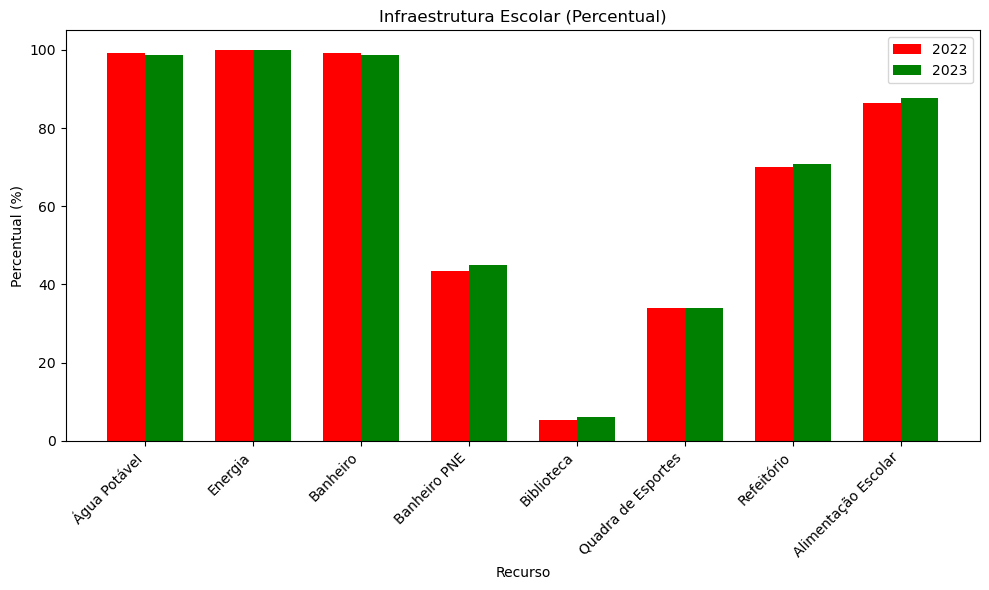

In [40]:
# Gráfico 6: Percentual de Escolas com Infraestrutura

# Dados
infraestrutura_escolar = {
    "Recurso": ["Água Potável", "Energia", "Banheiro", "Banheiro PNE", "Biblioteca", "Quadra de Esportes", "Refeitório", "Alimentação Escolar"],
    "Percentual 2022": [99.32, 100, 99.32, 43.54, 5.44, 34.01, 70.07, 86.39],
    "Percentual 2023": [98.64, 100, 98.64, 44.90, 6.12, 34.01, 70.75, 87.76],
}

df_infraestrutura_escolar = pd.DataFrame(infraestrutura_escolar)

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(df_infraestrutura_escolar["Recurso"]))

# Gráficos de barras
bar1 = ax.bar(index, df_infraestrutura_escolar["Percentual 2022"], bar_width, label='2022', color='r')
bar2 = ax.bar(index + bar_width, df_infraestrutura_escolar["Percentual 2023"], bar_width, label='2023', color='g')

# Títulos e legendas
ax.set_xlabel("Recurso")
ax.set_ylabel("Percentual (%)")
ax.set_title("Infraestrutura Escolar (Percentual)")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_infraestrutura_escolar["Recurso"], rotation=45, ha='right')
ax.legend()

# Exibição do gráfico
plt.tight_layout()
plt.show()

Recursos de informática e mídia 

In [41]:
# Percentual de escolas e recursos de informática e mídia
df_2022_recursos_info = df_2022[
    [
        'IN_INTERNET',
        'IN_INTERNET_ALUNOS',
        'IN_COMPUTADOR',
        'IN_EQUIP_IMPRESSORA',
        'IN_EQUIP_TV',
        'IN_EQUIP_LOUSA_DIGITAL',
        'IN_EQUIP_MULTIMIDIA',
        'IN_DESKTOP_ALUNO',
        'IN_COMP_PORTATIL_ALUNO',
        'IN_TABLET_ALUNO'
    ]
].mean() * 100

df_2023_recursos_info = df_2023[
    [
        'IN_INTERNET',
        'IN_INTERNET_ALUNOS',
        'IN_COMPUTADOR',
        'IN_EQUIP_IMPRESSORA',
        'IN_EQUIP_TV',
        'IN_EQUIP_LOUSA_DIGITAL',
        'IN_EQUIP_MULTIMIDIA',
        'IN_DESKTOP_ALUNO',
        'IN_COMP_PORTATIL_ALUNO',
        'IN_TABLET_ALUNO'
    ]
].mean() * 100


In [42]:
df_2022_recursos_info

IN_INTERNET               91.156463
IN_INTERNET_ALUNOS        34.013605
IN_COMPUTADOR             87.755102
IN_EQUIP_IMPRESSORA       62.585034
IN_EQUIP_TV               86.394558
IN_EQUIP_LOUSA_DIGITAL    19.047619
IN_EQUIP_MULTIMIDIA       28.571429
IN_DESKTOP_ALUNO          40.816327
IN_COMP_PORTATIL_ALUNO    18.367347
IN_TABLET_ALUNO           13.605442
dtype: float64

In [43]:
df_2023_recursos_info

IN_INTERNET               93.197279
IN_INTERNET_ALUNOS        36.054422
IN_COMPUTADOR             89.115646
IN_EQUIP_IMPRESSORA       62.585034
IN_EQUIP_TV               85.034014
IN_EQUIP_LOUSA_DIGITAL    19.047619
IN_EQUIP_MULTIMIDIA       27.891156
IN_DESKTOP_ALUNO          40.816327
IN_COMP_PORTATIL_ALUNO    21.088435
IN_TABLET_ALUNO           16.326531
dtype: float64

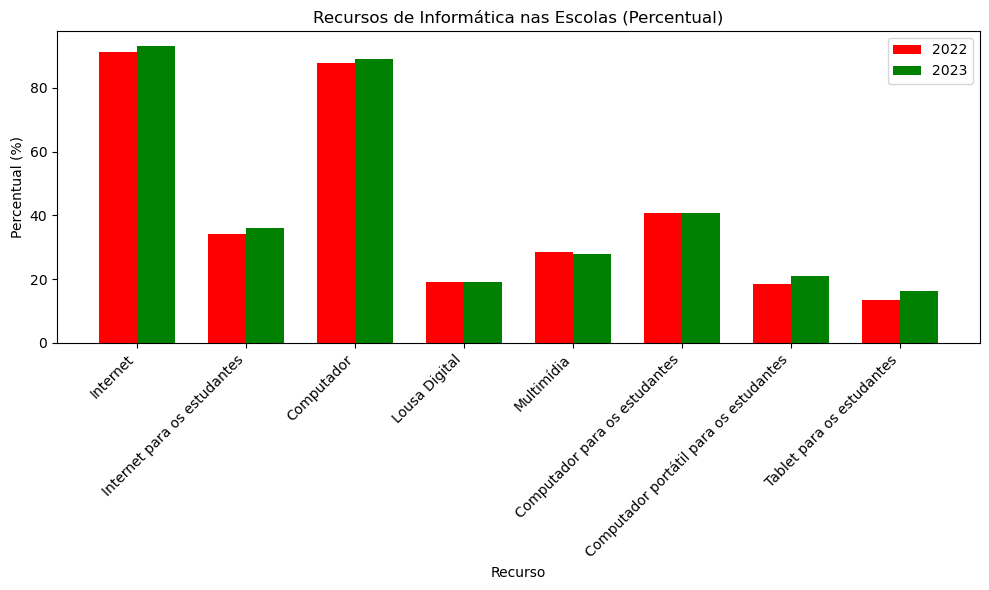

In [44]:
# Dados do Gráfico 1
recursos_info = {
    "Recurso": ["Internet", "Internet para os estudantes", "Computador", "Lousa Digital", "Multimídia", 
                "Computador para os estudantes", "Computador portátil para os estudantes", "Tablet para os estudantes"],
    "Percentual 2022": [91.16, 34.01, 87.76, 19.05, 28.57, 40.82, 18.37, 13.61],
    "Percentual 2023": [93.20, 36.05, 89.12, 19.05, 27.89, 40.82, 21.09, 16.33],
}

df_recursos_info = pd.DataFrame(recursos_info)

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(df_recursos_info["Recurso"]))

# Gráficos de barras
bar1 = ax.bar(index, df_recursos_info["Percentual 2022"], bar_width, label='2022', color='r')
bar2 = ax.bar(index + bar_width, df_recursos_info["Percentual 2023"], bar_width, label='2023', color='g')

# Títulos e legendas
ax.set_xlabel("Recurso")
ax.set_ylabel("Percentual (%)")
ax.set_title("Recursos de Informática nas Escolas (Percentual)")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_recursos_info["Recurso"], rotation=45, ha='right')
ax.legend()

# Exibição do gráfico
plt.tight_layout()
plt.show()

In [45]:
# Percentual de escolas que possuem profissionais além de docentes
df_2022_demais_prof = df_2022[
    [
        'IN_PROF_SERVICOS_GERAIS',
        'IN_PROF_BIBLIOTECARIO',
        'IN_PROF_SAUDE',
        'IN_PROF_COORDENADOR',
        'IN_PROF_NUTRICIONISTA',
        'IN_PROF_PSICOLOGO',
        'IN_PROF_SEGURANCA'
    ]
].mean() * 100

df_2023_demais_prof = df_2023[
    [
        'IN_PROF_SERVICOS_GERAIS',
        'IN_PROF_BIBLIOTECARIO',
        'IN_PROF_SAUDE',
        'IN_PROF_COORDENADOR',
        'IN_PROF_NUTRICIONISTA',
        'IN_PROF_PSICOLOGO',
        'IN_PROF_SEGURANCA'
    ]
].mean() * 100


In [46]:
df_2022_demais_prof

IN_PROF_SERVICOS_GERAIS    93.197279
IN_PROF_BIBLIOTECARIO      12.925170
IN_PROF_SAUDE               2.040816
IN_PROF_COORDENADOR        34.013605
IN_PROF_NUTRICIONISTA      10.204082
IN_PROF_PSICOLOGO           5.442177
IN_PROF_SEGURANCA           6.122449
dtype: float64

In [47]:
df_2023_demais_prof

IN_PROF_SERVICOS_GERAIS    94.557823
IN_PROF_BIBLIOTECARIO      12.925170
IN_PROF_SAUDE               1.360544
IN_PROF_COORDENADOR        35.374150
IN_PROF_NUTRICIONISTA      10.204082
IN_PROF_PSICOLOGO          12.925170
IN_PROF_SEGURANCA          10.204082
dtype: float64

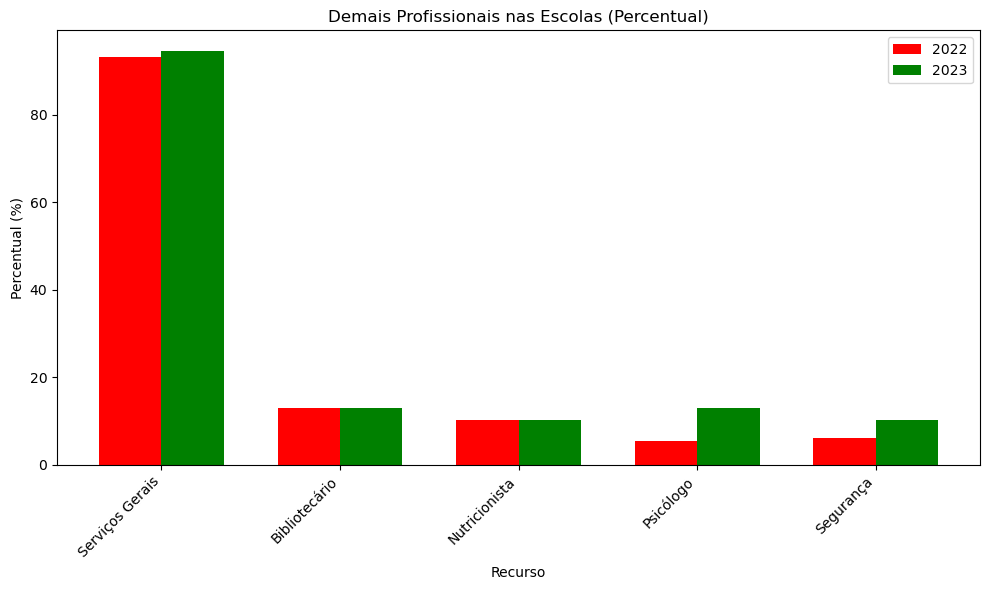

In [48]:
demais_prof = {
    "Recurso": ["Serviços Gerais", "Bibliotecário", "Nutricionista", "Psicólogo", "Segurança"],
    "Percentual 2022": [93.20, 12.93, 10.20, 5.44, 6.12],
    "Percentual 2023": [94.56, 12.93, 10.20, 12.93, 10.20],
}

df_demais_prof = pd.DataFrame(demais_prof)

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(df_demais_prof["Recurso"]))

# Gráficos de barras
bar1 = ax.bar(index, df_demais_prof["Percentual 2022"], bar_width, label='2022', color='r')
bar2 = ax.bar(index + bar_width, df_demais_prof["Percentual 2023"], bar_width, label='2023', color='g')

# Títulos e legendas
ax.set_xlabel("Recurso")
ax.set_ylabel("Percentual (%)")
ax.set_title("Demais Profissionais nas Escolas (Percentual)")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_demais_prof["Recurso"], rotation=45, ha='right')
ax.legend()

# Exibição do gráfico
plt.tight_layout()
plt.show()

## 2. Comparações históricas

Para comparar as mudanças entre 2022 e 2023, calculamos as variações percentuais entre os dois anos.

In [49]:
# Comparação percentual entre 2022 e 2023
var_percent_estudantes = ((total_estudantes_2023 - total_estudantes_2022) / total_estudantes_2022) * 100
var_percent_docentes = ((total_docentes_2023 - total_docentes_2022) / total_docentes_2022) * 100

print(f"Variação percentual de estudantes entre os anos de 2022 e 2023: {var_percent_estudantes}")
print(f"Variação percentual de docentes entre os anos de 2022 e 2023: {var_percent_docentes}")

Variação percentual de estudantes entre os anos de 2022 e 2023: 1.6591499248325818
Variação percentual de docentes entre os anos de 2022 e 2023: 1.1627906976744187


## 3. Tópicos globais em educação e insights

Pesquisando tópicos globais na educação, alguns pontos comuns incluem:

Educação inclusiva: O acesso igualitário para estudantes de diferentes grupos socioeconômicos, étnicos e de gênero.

Recursos tecnológicos: Importância da conectividade e das tecnologias nas escolas.

Qualidade do ensino: Relação professor-aluno e impacto da infraestrutura escolar.

Com os dados disponíveis, você pode explorar desigualdades no acesso a recursos tecnológicos, analisar a distribuição de estudantes por cor/raça e gênero, e avaliar o impacto das infraestruturas nas escolas.

In [50]:
df_2022_masculino = df_2022['QT_MAT_BAS_MASC'].sum()
df_2022_feminino = df_2022['QT_MAT_BAS_FEM'].sum()
print(f"Matriculas do sexo masculino em 2022: {df_2022_masculino}")
print(f"Matriculas do sexo feminino em 2022: {df_2022_feminino}")

df_2023_masculino = df_2023['QT_MAT_BAS_MASC'].sum()
df_2023_feminino = df_2023['QT_MAT_BAS_FEM'].sum()
print(f"Matriculas do sexo masculino em 2023: {df_2023_masculino}")
print(f"Matriculas do sexo feminino em 2023: {df_2023_feminino}")

Matriculas do sexo masculino em 2022: 18326.0
Matriculas do sexo feminino em 2022: 18259.0
Matriculas do sexo masculino em 2023: 18751.0
Matriculas do sexo feminino em 2023: 18441.0


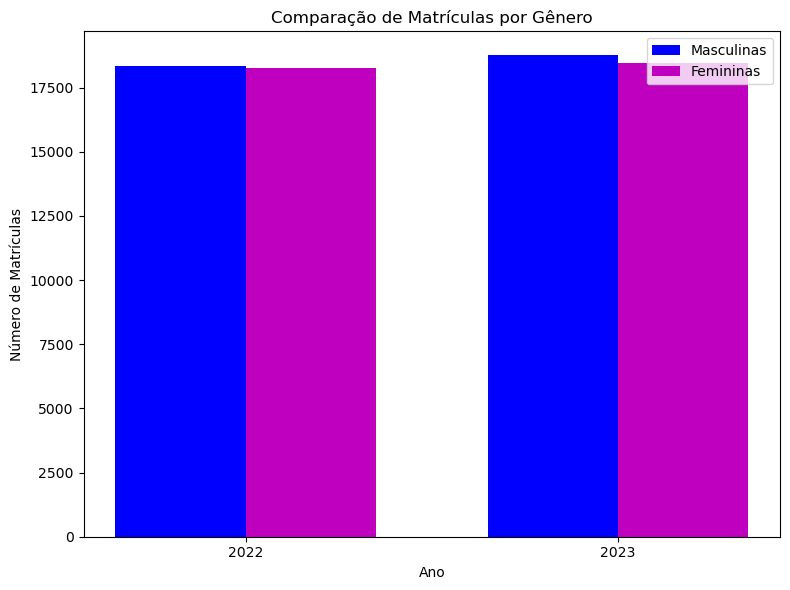

In [51]:
# Dados
matriculas_genero = {
    "Ano": ["2022", "2023"],
    "Matrículas Masculinas": [18326, 18751],
    "Matrículas Femininas": [18259, 18441],
}

df_matriculas_genero = pd.DataFrame(matriculas_genero)

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(df_matriculas_genero["Ano"]))

# Gráficos de barras
bar1 = ax.bar(index, df_matriculas_genero["Matrículas Masculinas"], bar_width, label='Masculinas', color='b')
bar2 = ax.bar(index + bar_width, df_matriculas_genero["Matrículas Femininas"], bar_width, label='Femininas', color='m')

# Títulos e legendas
ax.set_xlabel("Ano")
ax.set_ylabel("Número de Matrículas")
ax.set_title("Comparação de Matrículas por Gênero")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_matriculas_genero["Ano"])
ax.legend()

# Exibição do gráfico
plt.tight_layout()
plt.show()

In [52]:
df_2022_eja = df_2022['QT_MAT_EJA'].sum()
df_2022_eja_fund = df_2022['QT_MAT_EJA_FUND'].sum()
df_2022_eja_med = df_2022['QT_MAT_EJA_MED'].sum()
print(f"Matrículas no EJA em 2022: {df_2022_eja}")
print(f"Matrículas no EJA para o ensino fundamental em 2022: {df_2022_eja_fund}")
print(f"Matrículas no EJA para o ensino médio em 2022: {df_2022_eja_med}")

df_2023_eja = df_2023['QT_MAT_EJA'].sum()
df_2023_eja_fund = df_2023['QT_MAT_EJA_FUND'].sum()
df_2023_eja_med = df_2023['QT_MAT_EJA_MED'].sum()
print(f"Matrículas no EJA em 2023: {df_2023_eja}")
print(f"Matrículas no EJA para o ensino fundamental em 2023: {df_2023_eja_fund}")
print(f"Matrículas no EJA para o ensino médio em 2023: {df_2023_eja_med}")

Matrículas no EJA em 2022: 384.0
Matrículas no EJA para o ensino fundamental em 2022: 143.0
Matrículas no EJA para o ensino médio em 2022: 241.0
Matrículas no EJA em 2023: 351.0
Matrículas no EJA para o ensino fundamental em 2023: 142.0
Matrículas no EJA para o ensino médio em 2023: 209.0


In [53]:
df_2022_nd = df_2022['QT_MAT_BAS_ND'].sum()
df_2022_branca = df_2022['QT_MAT_BAS_BRANCA'].sum()
df_2022_preta = df_2022['QT_MAT_BAS_PRETA'].sum()
df_2022_parda = df_2022['QT_MAT_BAS_PARDA'].sum()
df_2022_amarela = df_2022['QT_MAT_BAS_AMARELA'].sum()
df_2022_indigena = df_2022['QT_MAT_BAS_INDIGENA'].sum()
print(f"2022 não declarada: {df_2022_nd}")
print(f"2022 branca: {df_2022_branca}")
print(f"2022 preta: {df_2022_preta}")
print(f"2022 parda: {df_2022_parda}")
print(f"2022 amarela: {df_2022_amarela}")
print(f"2022 indígena: {df_2022_indigena}")

df_2023_nd = df_2023['QT_MAT_BAS_ND'].sum()
df_2023_branca = df_2023['QT_MAT_BAS_BRANCA'].sum()
df_2023_preta = df_2023['QT_MAT_BAS_PRETA'].sum()
df_2023_parda = df_2023['QT_MAT_BAS_PARDA'].sum()
df_2023_amarela = df_2023['QT_MAT_BAS_AMARELA'].sum()
df_2023_indigena = df_2023['QT_MAT_BAS_INDIGENA'].sum()
print(f"2023 não declarada: {df_2023_nd}")
print(f"2023 branca: {df_2023_branca}")
print(f"2023 preta: {df_2023_preta}")
print(f"2023 parda: {df_2023_parda}")
print(f"2023 amarela: {df_2023_amarela}")
print(f"2023 indígena: {df_2023_indigena}")

2022 não declarada: 6080.0
2022 branca: 26287.0
2022 preta: 320.0
2022 parda: 3838.0
2022 amarela: 44.0
2022 indígena: 16.0
2023 não declarada: 6172.0
2023 branca: 26510.0
2023 preta: 399.0
2023 parda: 4045.0
2023 amarela: 46.0
2023 indígena: 20.0


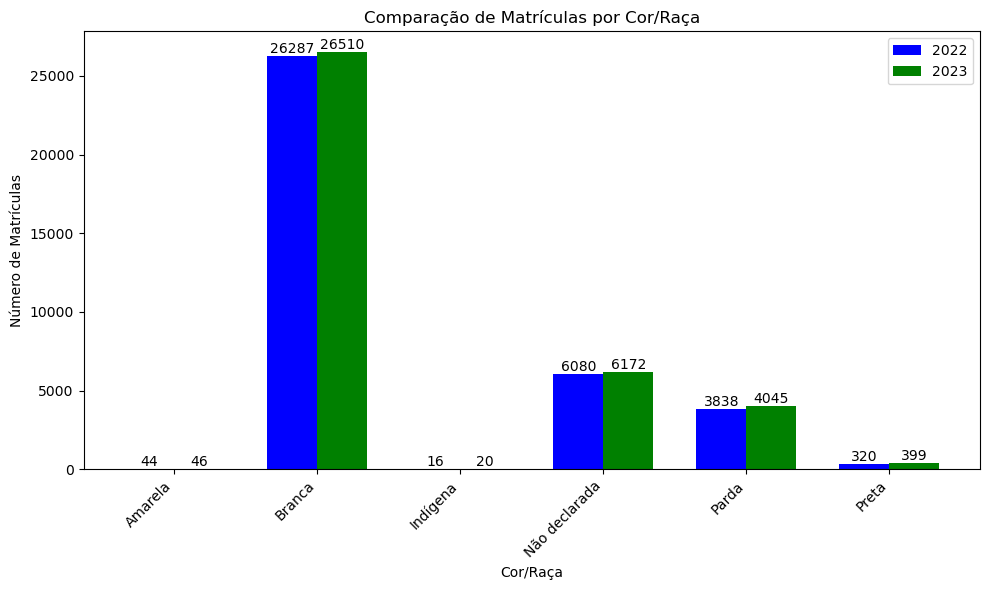

In [54]:
# Dados
matriculas_raca = {
    "Cor/Raça": ["Não declarada", "Branca", "Preta", "Parda", "Amarela", "Indígena"],
    "Matrículas 2022": [6080, 26287, 320, 3838, 44, 16],
    "Matrículas 2023": [6172, 26510, 399, 4045, 46, 20],
}

df_matriculas_raca = pd.DataFrame(matriculas_raca)

# Organizando os dados por ordem alfabética
df_matriculas_raca = df_matriculas_raca.sort_values(by="Cor/Raça")

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(df_matriculas_raca["Cor/Raça"]))

# Gráficos de barras
bar1 = ax.bar(index, df_matriculas_raca["Matrículas 2022"], bar_width, label='2022', color='b')
bar2 = ax.bar(index + bar_width, df_matriculas_raca["Matrículas 2023"], bar_width, label='2023', color='g')

# Adicionando rótulos nas barras
for i in range(len(bar1)):
    ax.text(bar1[i].get_x() + bar1[i].get_width() / 2, bar1[i].get_height(), 
            f'{int(bar1[i].get_height())}', ha='center', va='bottom', fontsize=10)
    ax.text(bar2[i].get_x() + bar2[i].get_width() / 2, bar2[i].get_height(), 
            f'{int(bar2[i].get_height())}', ha='center', va='bottom', fontsize=10)

# Títulos e legendas
ax.set_xlabel("Cor/Raça")
ax.set_ylabel("Número de Matrículas")
ax.set_title("Comparação de Matrículas por Cor/Raça")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_matriculas_raca["Cor/Raça"], rotation=45, ha='right')
ax.legend()

# Exibição do gráfico
plt.tight_layout()
plt.show()

## Exportando os dataframes para análise de BI

In [55]:
df_2022_tatui.to_excel("df_2022_tatui.xlsx", index=False)
df_2023_tatui.to_excel("df_2023_tatui.xlsx", index=False)

NameError: name 'df_2022_tatui' is not defined

## Gráficos


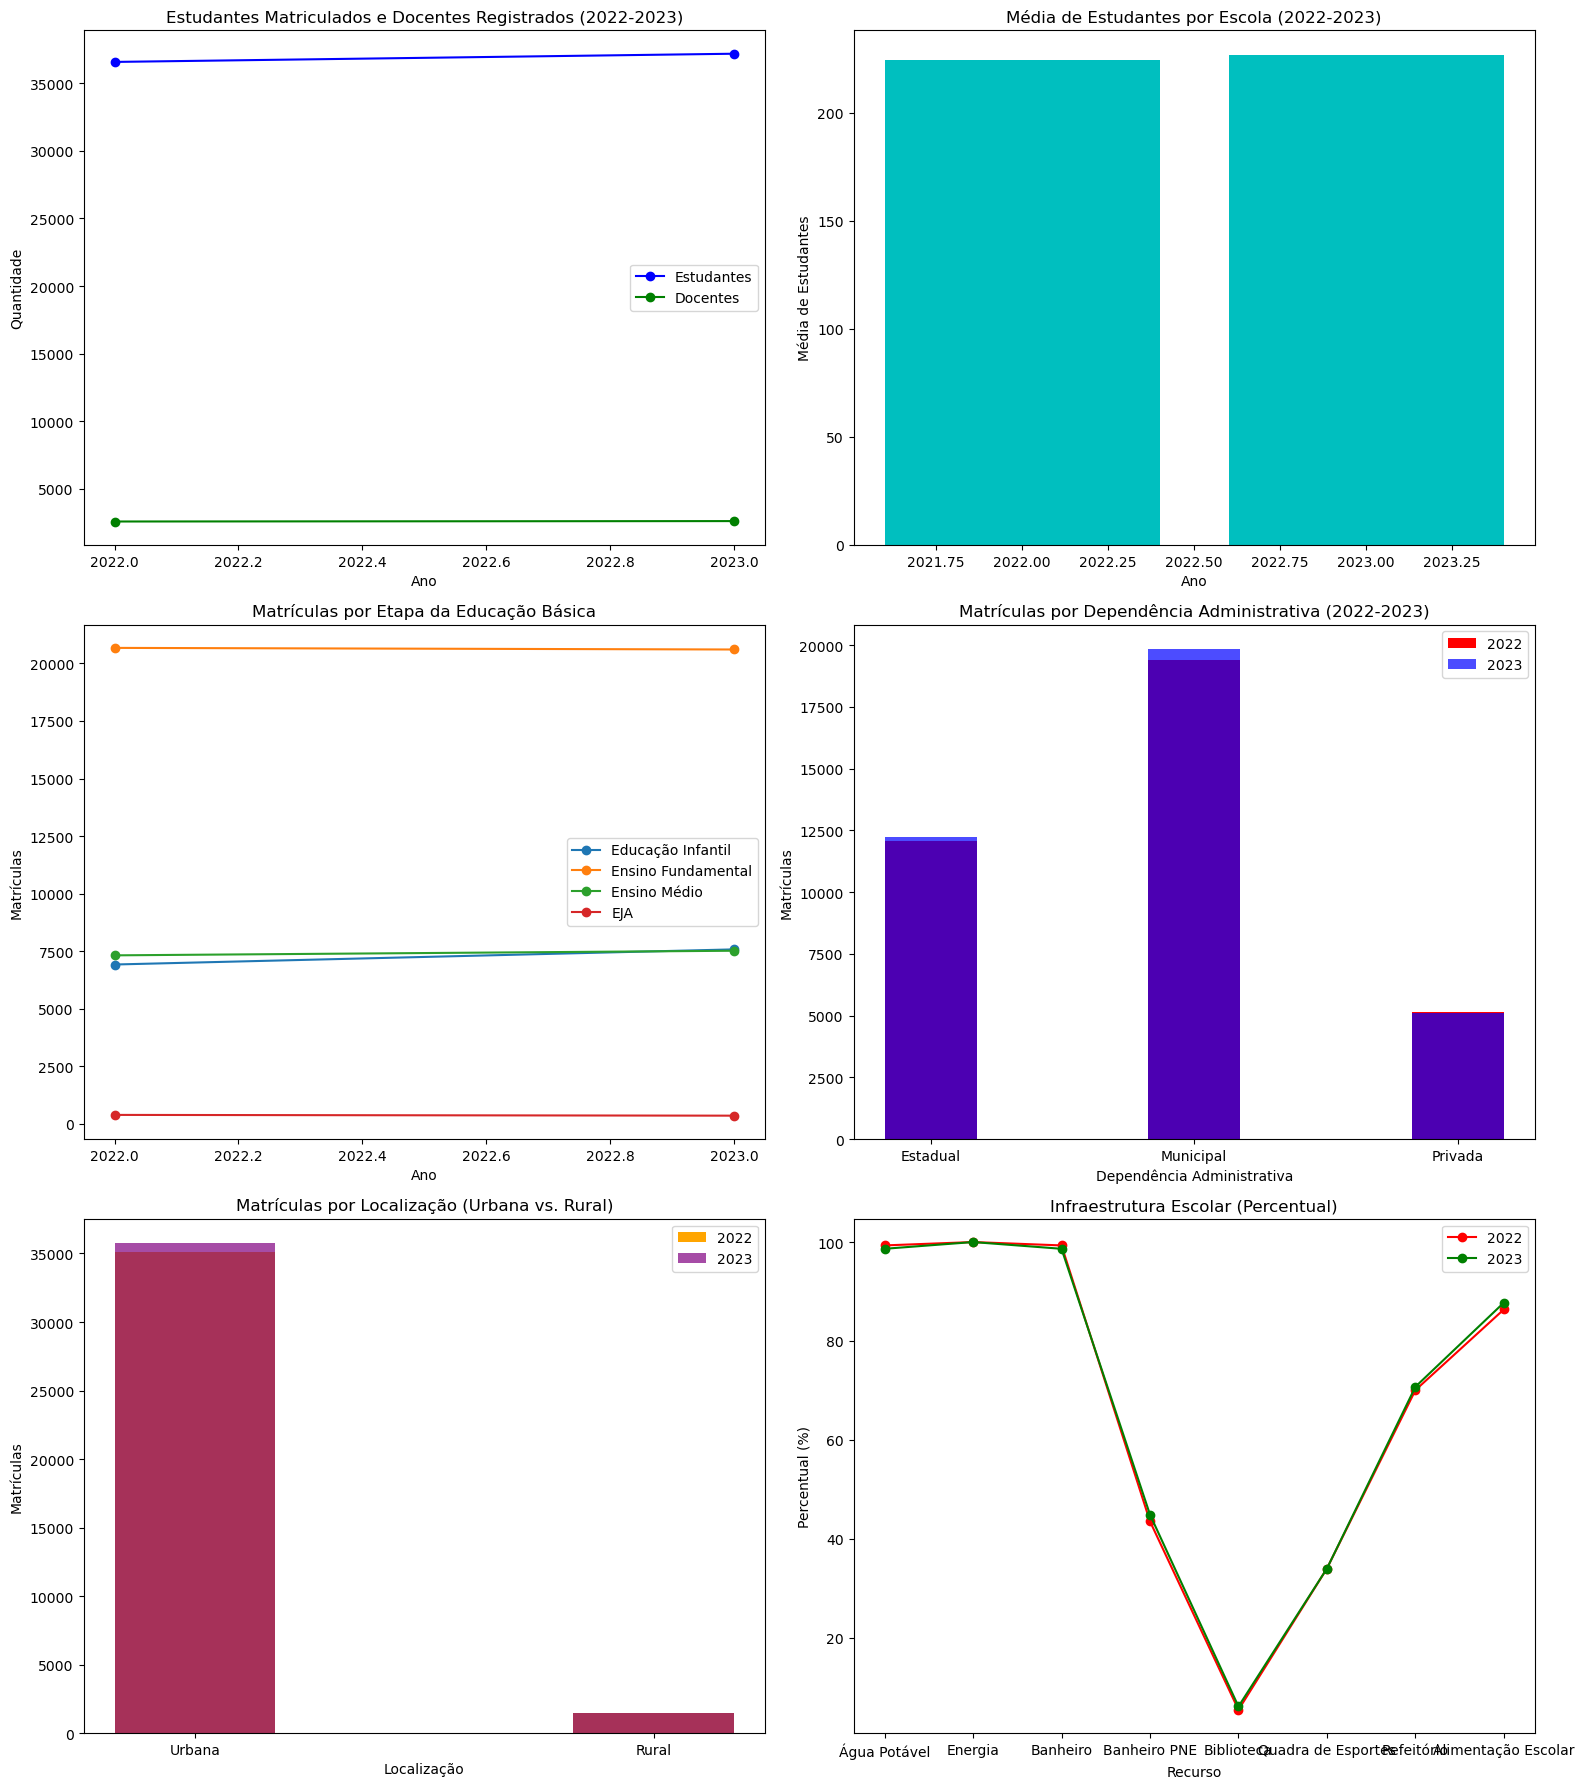

In [56]:
# Dados fornecidos para criação dos gráficos
dados_gerais = {
    "Ano": [2022, 2023],
    "Estudantes Matriculados": [36585, 37192],
    "Docentes Registrados": [2580, 2610],
}

media_alunos_escola = {
    "Ano": [2022, 2023],
    "Média de Estudantes por Escola": [224.45, 226.78],
}

matriculas_etapas = {
    "Ano": [2022, 2023],
    "Educação Infantil": [6919, 7576],
    "Ensino Fundamental": [20676, 20606],
    "Ensino Médio": [7317, 7517],
    "EJA": [384, 351],
}

matriculas_dependencia = {
    "Dependência Administrativa": ["Estadual", "Municipal", "Privada"],
    "Matrículas 2022": [12061, 19395, 5129],
    "Matrículas 2023": [12250, 19844, 5098],
}

matriculas_localizacao = {
    "Localização": ["Urbana", "Rural"],
    "Matrículas 2022": [35142, 1443],
    "Matrículas 2023": [35751, 1441],
}

infraestrutura_escolar = {
    "Recurso": ["Água Potável", "Energia", "Banheiro", "Banheiro PNE", "Biblioteca", "Quadra de Esportes", "Refeitório", "Alimentação Escolar"],
    "Percentual 2022": [99.32, 100, 99.32, 43.54, 5.44, 34.01, 70.07, 86.39],
    "Percentual 2023": [98.64, 100, 98.64, 44.90, 6.12, 34.01, 70.75, 87.76],
}

# Transforming dictionaries into dataframes
df_dados_gerais = pd.DataFrame(dados_gerais)
df_media_alunos_escola = pd.DataFrame(media_alunos_escola)
df_matriculas_etapas = pd.DataFrame(matriculas_etapas)
df_matriculas_dependencia = pd.DataFrame(matriculas_dependencia)
df_matriculas_localizacao = pd.DataFrame(matriculas_localizacao)
df_infraestrutura_escolar = pd.DataFrame(infraestrutura_escolar)

# Creating the subplots to visualize each category

fig, axs = plt.subplots(3, 2, figsize=(16, 18))

# Gráfico 1: Estudantes Matriculados e Docentes Registrados (Análise Geral)
axs[0, 0].plot(df_dados_gerais["Ano"], df_dados_gerais["Estudantes Matriculados"], label='Estudantes', marker='o', color='b')
axs[0, 0].plot(df_dados_gerais["Ano"], df_dados_gerais["Docentes Registrados"], label='Docentes', marker='o', color='g')
axs[0, 0].set_title("Estudantes Matriculados e Docentes Registrados (2022-2023)")
axs[0, 0].set_xlabel("Ano")
axs[0, 0].set_ylabel("Quantidade")
axs[0, 0].legend()

# Gráfico 2: Média de Estudantes por Escola
axs[0, 1].bar(df_media_alunos_escola["Ano"], df_media_alunos_escola["Média de Estudantes por Escola"], color='c')
axs[0, 1].set_title("Média de Estudantes por Escola (2022-2023)")
axs[0, 1].set_xlabel("Ano")
axs[0, 1].set_ylabel("Média de Estudantes")

# Gráfico 3: Matrículas por Etapa da Educação
axs[1, 0].plot(df_matriculas_etapas["Ano"], df_matriculas_etapas["Educação Infantil"], label='Educação Infantil', marker='o')
axs[1, 0].plot(df_matriculas_etapas["Ano"], df_matriculas_etapas["Ensino Fundamental"], label='Ensino Fundamental', marker='o')
axs[1, 0].plot(df_matriculas_etapas["Ano"], df_matriculas_etapas["Ensino Médio"], label='Ensino Médio', marker='o')
axs[1, 0].plot(df_matriculas_etapas["Ano"], df_matriculas_etapas["EJA"], label='EJA', marker='o')
axs[1, 0].set_title("Matrículas por Etapa da Educação Básica")
axs[1, 0].set_xlabel("Ano")
axs[1, 0].set_ylabel("Matrículas")
axs[1, 0].legend()

# Gráfico 4: Matrículas por Dependência Administrativa
width = 0.35
axs[1, 1].bar(df_matriculas_dependencia["Dependência Administrativa"], df_matriculas_dependencia["Matrículas 2022"], width, label='2022', color='r')
axs[1, 1].bar(df_matriculas_dependencia["Dependência Administrativa"], df_matriculas_dependencia["Matrículas 2023"], width, label='2023', color='b', alpha=0.7)
axs[1, 1].set_title("Matrículas por Dependência Administrativa (2022-2023)")
axs[1, 1].set_xlabel("Dependência Administrativa")
axs[1, 1].set_ylabel("Matrículas")
axs[1, 1].legend()

# Gráfico 5: Matrículas por Localização (Urbana vs. Rural)
axs[2, 0].bar(df_matriculas_localizacao["Localização"], df_matriculas_localizacao["Matrículas 2022"], width, label='2022', color='orange')
axs[2, 0].bar(df_matriculas_localizacao["Localização"], df_matriculas_localizacao["Matrículas 2023"], width, label='2023', color='purple', alpha=0.7)
axs[2, 0].set_title("Matrículas por Localização (Urbana vs. Rural)")
axs[2, 0].set_xlabel("Localização")
axs[2, 0].set_ylabel("Matrículas")
axs[2, 0].legend()

# Gráfico 6: Percentual de Escolas com Infraestrutura
axs[2, 1].plot(df_infraestrutura_escolar["Recurso"], df_infraestrutura_escolar["Percentual 2022"], label='2022', marker='o', color='r')
axs[2, 1].plot(df_infraestrutura_escolar["Recurso"], df_infraestrutura_escolar["Percentual 2023"], label='2023', marker='o', color='g')
axs[2, 1].set_title("Infraestrutura Escolar (Percentual)")
axs[2, 1].set_xlabel("Recurso")
axs[2, 1].set_ylabel("Percentual (%)")
axs[2, 1].legend()

plt.tight_layout()
plt.show()
